In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Kara = pd.read_excel(filepath, sheet_name='Kara-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Kara)
fp.date_time(Kara)

,Extent,Date
0,917992.880,1979-01-01
1,917992.880,1979-02-01
2,917992.880,1979-03-01
3,917992.880,1979-04-01
4,917992.880,1979-05-01
...,...,...
533,728642.743,2023-06-01
534,437024.646,2023-07-01
535,202260.789,2023-08-01
536,98103.856,2023-09-01


In [5]:
scaler = MinMaxScaler()
Kara['Extent'] = scaler.fit_transform(Kara['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Kara['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Kara_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.6254 - root_mean_squared_error: 0.7908

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 8s 107ms/step - loss: 0.6230 - root_mean_squared_error: 0.7893 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6718
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.5561 - root_mean_squared_error: 0.7457

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.5510 - root_mean_squared_error: 0.7423 - val_loss: 0.4211 - val_root_mean_squared_error: 0.6489
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.4822 - root_mean_squared_error: 0.6944

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.4824 - root_mean_squared_error: 0.6946 - val_loss: 0.3840 - val_root_mean_squared_error: 0.6197
Epoch 4/50
49/53 [==========================>...] - ETA: 0s - loss: 0.4203 - root_mean_squared_error: 0.6483

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.4200 - root_mean_squared_error: 0.6481 - val_loss: 0.3239 - val_root_mean_squared_error: 0.5691
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.3694 - root_mean_squared_error: 0.6078

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.3675 - root_mean_squared_error: 0.6063 - val_loss: 0.2912 - val_root_mean_squared_error: 0.5396
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.3086 - root_mean_squared_error: 0.5556

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.3094 - root_mean_squared_error: 0.5562 - val_loss: 0.2600 - val_root_mean_squared_error: 0.5099
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2634 - root_mean_squared_error: 0.5132

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.2618 - root_mean_squared_error: 0.5117 - val_loss: 0.2199 - val_root_mean_squared_error: 0.4690
Epoch 8/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2210 - root_mean_squared_error: 0.4701

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.2165 - root_mean_squared_error: 0.4653 - val_loss: 0.1831 - val_root_mean_squared_error: 0.4279
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1804 - root_mean_squared_error: 0.4248

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.1784 - root_mean_squared_error: 0.4224 - val_loss: 0.1557 - val_root_mean_squared_error: 0.3946
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1507 - root_mean_squared_error: 0.3882

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1476 - root_mean_squared_error: 0.3842 - val_loss: 0.1550 - val_root_mean_squared_error: 0.3937
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1217 - root_mean_squared_error: 0.3489

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.1181 - root_mean_squared_error: 0.3436 - val_loss: 0.0867 - val_root_mean_squared_error: 0.2945
Epoch 12/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0944 - root_mean_squared_error: 0.3072 - val_loss: 0.0891 - val_root_mean_squared_error: 0.2985
Epoch 13/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0727 - root_mean_squared_error: 0.2696 - val_loss: 0.1196 - val_root_mean_squared_error: 0.3459
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0632 - root_mean_squared_error: 0.2515

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0639 - root_mean_squared_error: 0.2527 - val_loss: 0.0711 - val_root_mean_squared_error: 0.2667
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0481 - root_mean_squared_error: 0.2194

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0485 - root_mean_squared_error: 0.2201 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0431 - root_mean_squared_error: 0.2077 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1879
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0343 - root_mean_squared_error: 0.1851 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1902
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0313 - root_mean_squared_error: 0.1769 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1712
Epoch 19/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1589

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0258 - root_mean_squared_error: 0.1606 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1448
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0310 - root_mean_squared_error: 0.1760 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0240 - root_mean_squared_error: 0.1548 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 22/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1655

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0277 - root_mean_squared_error: 0.1664 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0277 - root_mean_squared_error: 0.1665 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1445
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0316 - root_mean_squared_error: 0.1777 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1787
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0310 - root_mean_squared_error: 0.1760 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479
Epoch 26/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1451
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0231 - root_mean_squared_error: 0.1518 - val_loss: 0.0393 - val_root_mean_square

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0251 - root_mean_squared_error: 0.1585 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405
Epoch 29/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0254 - root_mean_squared_error: 0.1592

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 30/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0239 - root_mean_squared_error: 0.1546 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0232 - root_mean_squared_error: 0.1522 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 32/50
52/53 [============================>.] - ETA: 0s - loss: 0.0216 - root_mean_squared_error: 0.1469

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0217 - root_mean_squared_error: 0.1472 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 33/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 34/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0246 - root_mean_squared_error: 0.1567 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1439
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0210 - root_mean_squared_error: 0.1448 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1362
Epoch 36/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0250 - root_mean_squared_error: 0.1580 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1358
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0234 - root_mean_squared_error: 0.1528 - val_loss: 0.0257 - val_root_mean_square

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0229 - root_mean_squared_error: 0.1514 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0239 - root_mean_squared_error: 0.1545 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1337
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0228 - root_mean_squared_error: 0.1509 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2004
Epoch 46/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0257 - root_mean_squared_error: 0.1605 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 47/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - val_loss: 0.0188 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT9\assets


INFO:tensorflow:Assets written to: Kara_model_LT9\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0226 - root_mean_squared_error: 0.1504 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8107272426287333 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

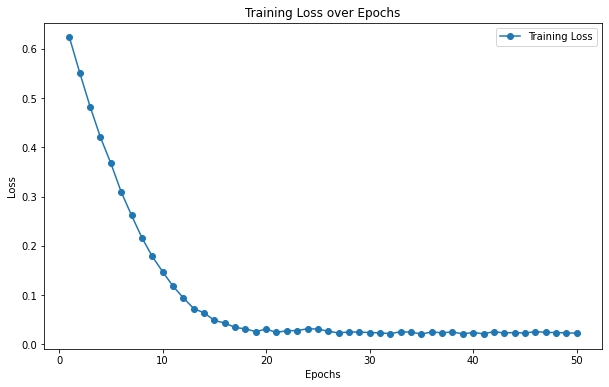

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

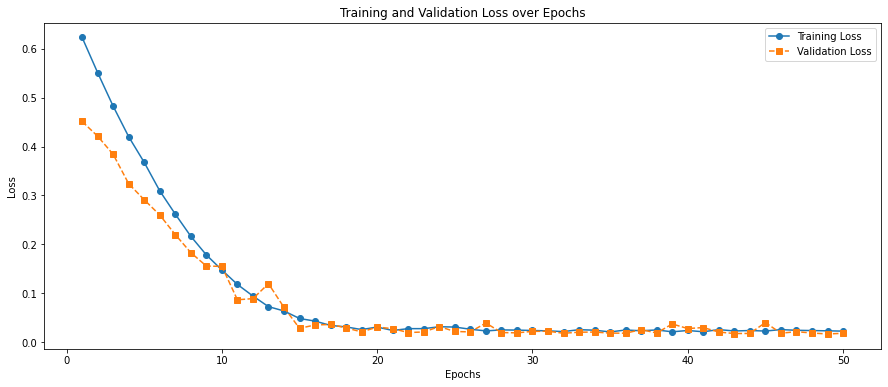

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Kara_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.12710545573920867
MAE : 0.08881028728368923


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,906190.937500,917006.278
1,876340.750000,906368.363
2,930023.187500,917403.622
3,899560.625000,910653.838
4,891527.375000,822319.125
5,712046.812500,557314.102
6,364302.187500,197129.525
7,227624.078125,75730.217
8,66257.281250,59608.479
9,376776.031250,88785.283


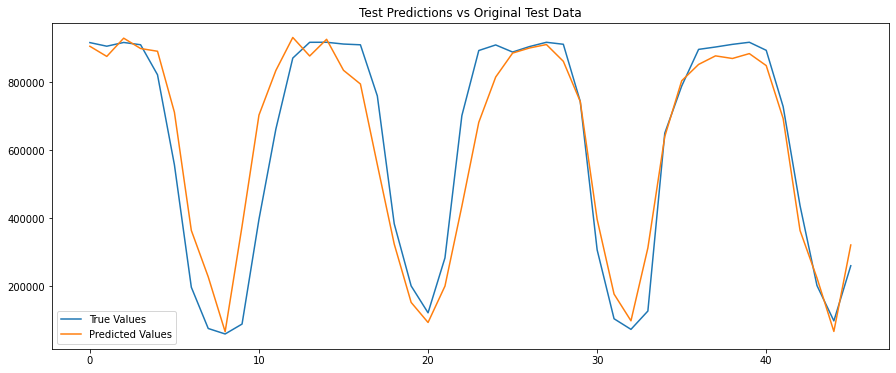

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

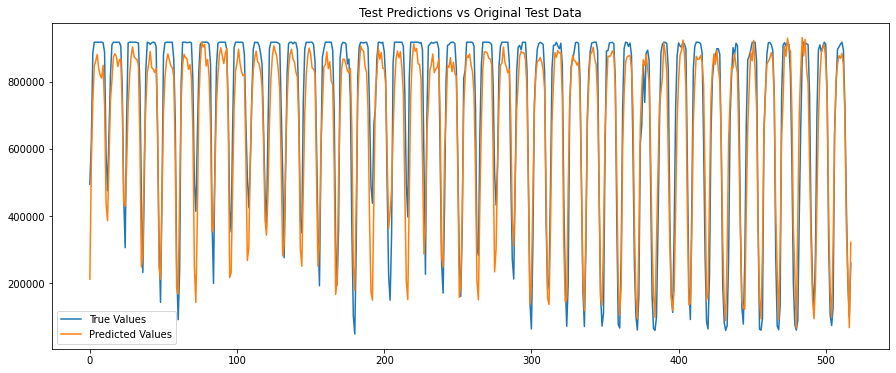

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()